In [180]:
import csv
import os
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Read in all draft csvs
files = []
for file in os.listdir("drafts"):
    if file.endswith(".csv"):
        files.append(os.path.join("drafts", file))

print("Found " + str(len(files)) + " drafts to analyze")

drafts = []
for file in files:
    picks = []
    with open(file, 'r') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        for row in reader:
            if (row[0] == "Overall Pick"):
                continue
            picks.append(row)
    cleansed_picks = clean_data(picks)
    drafts.append(cleansed_picks)

print("Finished parsing all drafts")

def clean_data(picks):
    cleansed_picks = []
    for pick in picks:
        items = []
        items.append(pick[0].strip()) # absolute pick number
        items.append(pick[1].strip()) # round
        items.append(pick[2].strip()) # pick in round
        player_data = pick[-5:]
        items.append(player_data[1].strip() + " " + player_data[0].strip()) # first + last name
        items.append(player_data[2].strip()) # position
        items.append(player_data[3].strip()) # team
        items.append(player_data[4].strip()) # bye
        cleansed_picks.append(items)
    return cleansed_picks

Found 24 drafts to analyze
Finished parsing all drafts


In [189]:
# Find adps for every player
player_adp = {}

for draft in drafts:
    for pick in draft:
        if (pick[4] == 'WR'):
            player = pick[3]
            if player in player_adp:
                player_pick_nums = player_adp[player]
                player_pick_nums.append(pick[0])
            else:
                player_pick_nums = [pick[0]]
                player_adp[player] = player_pick_nums

In [190]:
df = pd.DataFrame()
df['Player'] = []
df['Pick'] = []

all_players = player_adp.keys()
count = 20
skip = 0
for player in all_players:
    count = count - 1
    skip = skip + 1
    if skip < 0:
        continue
    if count <= 0:
        break
    player_picks = player_adp[player]
    player_picks = [int(x) for x in player_picks]
    for pick in player_picks:
        df = df.append({'Player' : player, 'Pick' : pick}, ignore_index = True)
    
medians = df.groupby(['Player'])['Pick'].median()
print(medians)
means = df.groupby(['Player'])['Pick'].mean()
print(means)

Player
A.J. Brown             41.5
Adam Thielen           40.5
Allen Robinson         31.0
Amari Cooper           37.5
Calvin Ridley          42.0
Chris Godwin           23.0
D.J. Moore             35.0
Davante Adams          12.0
DeAndre Hopkins        20.5
JuJu Smith-Schuster    34.0
Julio Jones            19.0
Kenny Golladay         29.0
Michael Thomas          5.0
Mike Evans             32.0
Odell Beckham          37.0
Robert Woods           47.0
Stefon Diggs           65.5
Terry McLaurin         49.0
Tyreek Hill            18.0
Name: Pick, dtype: float64
Player
A.J. Brown             40.791667
Adam Thielen           40.041667
Allen Robinson         31.250000
Amari Cooper           35.625000
Calvin Ridley          40.791667
Chris Godwin           23.541667
D.J. Moore             34.833333
Davante Adams          12.041667
DeAndre Hopkins        19.833333
JuJu Smith-Schuster    32.791667
Julio Jones            17.958333
Kenny Golladay         28.791667
Michael Thomas          5.45833

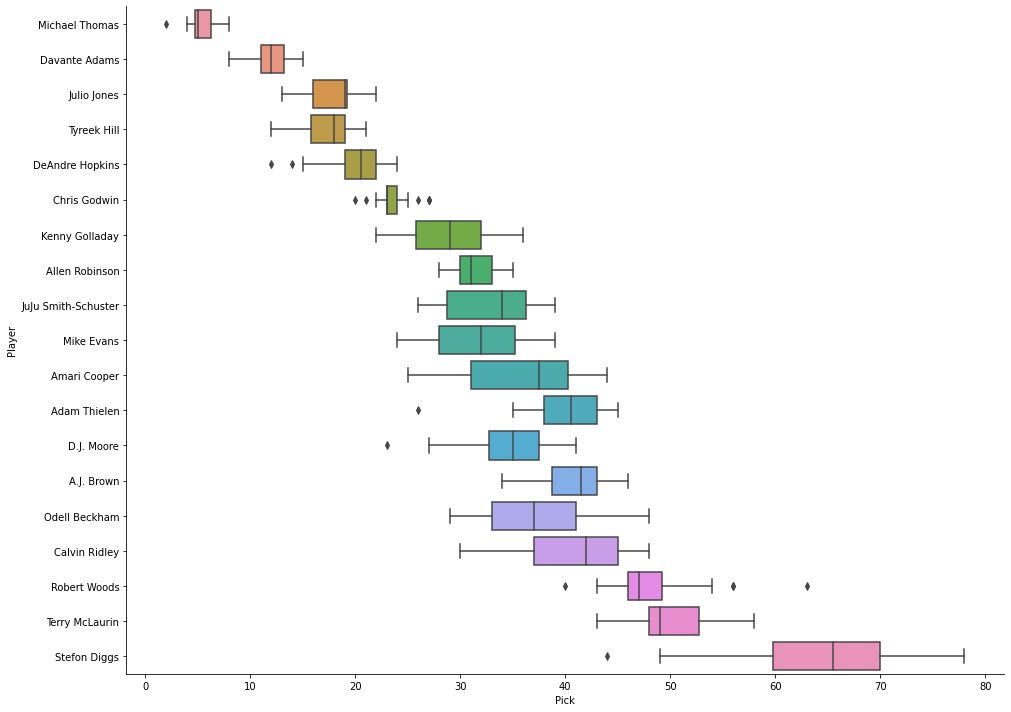

In [191]:
sns.catplot(x="Pick", y="Player", kind="box", data=df, orient='h', height=10, aspect=11.7/8.27);

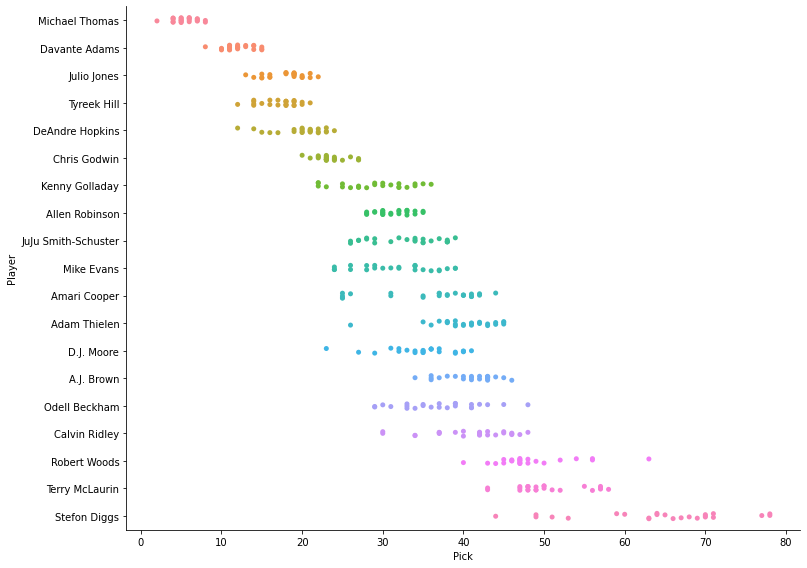

In [192]:
sns.catplot(x="Pick", y="Player", data=df, height=8, aspect=11.7/8.27);

In [193]:
#fig, ax = plt.subplots(figsize=(14,8))
#sns.swarmplot(x="Pick", y="Player", data=df, ax=ax)